# Arranque

In [ ]:
import pandas as pd

# URLs RAW de los archivos
url_quito = "https://raw.githubusercontent.com/simongonzalez158/Teoria-de-la-Informacion-tpe/main/temperature_Quito_celsius.csv"
url_melbourne = "https://raw.githubusercontent.com/simongonzalez158/Teoria-de-la-Informacion-tpe/main/temperature_Melbourne_celsius.csv"
url_melbourne_ruidoso = "https://raw.githubusercontent.com/simongonzalez158/Teoria-de-la-Informacion-tpe/main/temperature_Melbourne_celsius_ruidoso.csv"
url_oslo = "https://raw.githubusercontent.com/simongonzalez158/Teoria-de-la-Informacion-tpe/main/temperature_Oslo_celsius.csv"

# Leer los CSVs
S1_quito = pd.read_csv(url_quito)
S2_melbourne = pd.read_csv(url_melbourne)
S3_oslo = pd.read_csv(url_oslo)

# Mostrar todos los valores de la columna AvgTemperature
print(f"Temperatura promedio de Quito por día: {S1_quito['AvgTemperature'].to_list()}")
print(f"Temperatura promedio de Melbourne por día: {S2_melbourne['AvgTemperature'].to_list()}")
print(f"Temperatura promedio de Oslo por día: {S3_oslo['AvgTemperature'].to_list()}")

Temperatura promedio de Quito por día: [14.0, 14.0, 15.0, 14.0, 13.0, 12.0, 12.0, 14.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 15.0, 14.0, 14.0, 13.0, 14.0, 15.0, 15.0, 14.0, 13.0, 13.0, 15.0, 16.0, 15.0, 15.0, 14.0, 13.0, 14.0, 16.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 14.0, 14.0, 11.0, 13.0, 14.0, 13.0, 12.0, 11.0, 12.0, 11.0, 13.0, 13.0, 12.0, 14.0, 11.0, 15.0, 11.0, 12.0, 12.0, 18.0, 14.0, 13.0, 15.0, 10.0, 13.0, 14.0, 13.0, 13.0, 14.0, 13.0, 12.0, 13.0, 15.0, 14.0, 14.0, 13.0, 13.0, 12.0, 11.0, 13.0, 16.0, 14.0, 13.0, 14.0, 15.0, 14.0, 15.0, 13.0, 14.0, 14.0, 16.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 14.0, 15.0, 15.0, 15.0, 15.0, 16.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 14.0, 13.0, 14.0, 14.0, 13.0, 13.0, 14.0, 14.0, 14.0, 12.0, 12.0, 15.0, 13.0, 14.0, 14.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 13.0, 12.0, 12.0, 12.0, 13.0, 14.0, 14.0, 15.0, 15.0, 14.0, 13.0, 12.0, 14.0, 13.0, 14.0, 13.0, 13.0, 13.0, 

# Ejercicio 1

**1.1** Calcular la temperatura promedio y la desviación estándar para cada señal Si y analizar cómo se comportan estadísticamente.


**Media Aritmética**

Analíticamente, la media aritmética para una variable estocástica $X$,
que toma los valores $x1..xn$ con las respectivas probabilidades $p1..pn$,
se calcula como **$<X> \, = ∑_{i=1}^{n} x ⋅ p(x)$**. \
Dado que inicialmente no conocemos las probabilidades, nuestro método calcula la media aritmética de una manera más *directa*, recorriendo la fuente elemento a elemento para calcular la sumatoria de todas las temperaturas y luego dividir dicho valor por la cantidad total de datos. \
Esto da como resultado la temperatura promedio en determinada ciudad a lo largo del tiempo.



**Desvío Estándar**

El desvío estándar para $X$, haciendo provecho de la implementación del método que retorna la media, se calcula como:
**$σ(X) = \sqrt{<x^2> - <X>^2}$**

Quito:
  Promedio: 13.6
  Desvío estándar: 1.3
Melbourne:
  Promedio: 17.53
  Desvío estándar: 6.48
Oslo:
  Promedio: 4.61
  Desvío estándar: 9.46


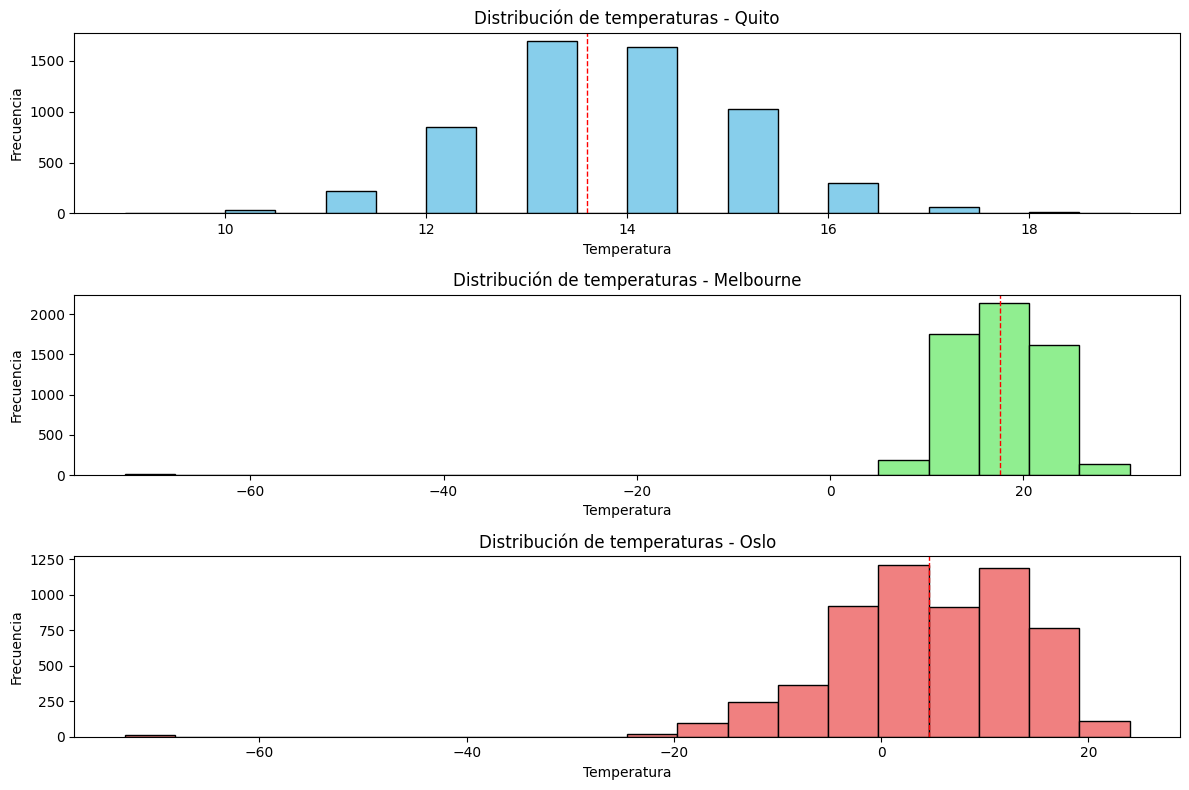

In [ ]:
import matplotlib.pyplot as plt

# Funciones para calcular el promedio y el desvio
def getMedia(data, pow=1):
    return sum(x**pow for x in data) / len(data)

def getDesvio(data):
    return (getMedia(data, 2) - getMedia(data)**2) ** 0.5

data_quito = S1_quito["AvgTemperature"].tolist()
data_melb = S2_melbourne["AvgTemperature"].tolist()
data_oslo = S3_oslo["AvgTemperature"].tolist()

ciudades = {
    "Quito": data_quito,
    "Melbourne": data_melb,
    "Oslo": data_oslo
}

for nombre, data in ciudades.items():
    media = getMedia(data)
    desvio = getDesvio(data)
    print(f"{nombre}:")
    print(f"  Promedio: {round(media, 2)}")
    print(f"  Desvío estándar: {round(desvio, 2)}")

# Graficar histogramas
plt.figure(figsize=(12, 8))

colores = {
    "Quito": "skyblue",
    "Melbourne": "lightgreen",
    "Oslo": "lightcoral"
}

for idx, (nombre, data) in enumerate(ciudades.items(), 1):
    media = getMedia(data)
    plt.subplot(3, 1, idx)
    plt.hist(data, bins=20, color=colores[nombre], edgecolor='black')
    plt.axvline(media, color='red', linestyle='dashed', linewidth=1)
    plt.title(f"Distribución de temperaturas - {nombre}")
    plt.xlabel("Temperatura")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


**1.2** Calcular el factor de correlación cruzada entre cada par de señales. Discutir si existen correlaciones significativas o no (tratando de establecer, por ejemplo, si Melbourne podría estar prediciendo el clima de Quito, o de Oslo.. o si no tienen nada que ver).


- El factor de correlación cruzada lo calculamos de manera tradicional aprovechando los cálculos previos de media y desvío.
La fórmula empleada es: $\sum_{i=1}^{n}\, \frac {(X_i-<X>) \,\cdot\, (Y_i\,-<Y>)}{σ(X)\cdot σ(Y)}$
- Los resultados de esta expresión se encuentran dentro del rango [-1,1].

In [ ]:
def calcular_correlacion(x, y):
    n = len(x)
    media_x = getMedia(x)
    media_y = getMedia(y)
    desvio_x = getDesvio(x)
    desvio_y = getDesvio(y)
    suma_producto = sum([xi * yi for xi, yi in zip(x, y)])
    return (suma_producto - n * media_x * media_y) / (n * desvio_x * desvio_y)

r_quito_melb = calcular_correlacion(S1_quito["AvgTemperature"], S2_melbourne["AvgTemperature"])
r_quito_oslo = calcular_correlacion(S1_quito["AvgTemperature"], S3_oslo["AvgTemperature"])
r_melb_oslo = calcular_correlacion(S2_melbourne["AvgTemperature"], S3_oslo["AvgTemperature"])

print(f"Correlación Quito - Melbourne: {r_quito_melb:.3f}")
print(f"Correlación Quito - Oslo: {r_quito_oslo:.3f}")
print(f"Correlación Melbourne - Oslo: {r_melb_oslo:.3f}")

Correlación Quito - Melbourne: -0.053
Correlación Quito - Oslo: 0.066
Correlación Melbourne - Oslo: -0.221


#### **Representación visual**
- Generamos diagramas de dispersión para visualizar la relación entre cada par de fuentes e identificar la correspondencia con las correlaciones calculadas.
- La escala de colores es un indicador de la cantidad de ocurrencias en ese punto del eje cartesiano.
- Como era de esperar, el primer y el segundo gráfico no muestran una tendencia clara en el comportamiento de los datos de ambas fuentes, mientras que el último presenta una especie de diagonal que indica un factor de correlación más fuerte, pero no alcanza a ser significativa.


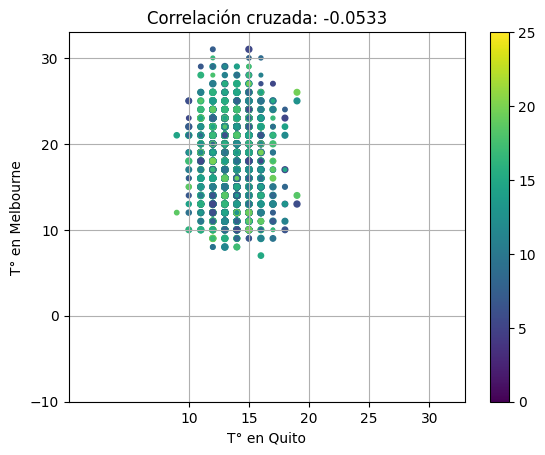

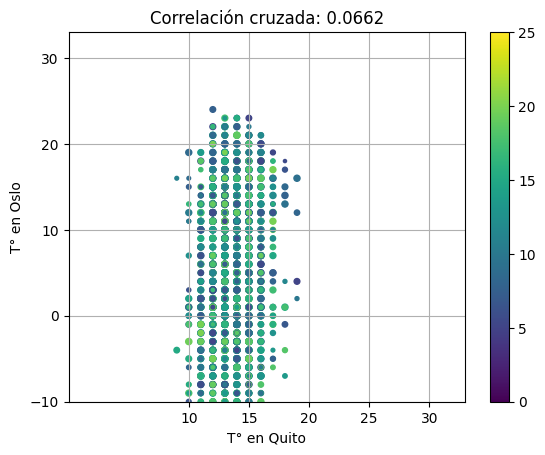

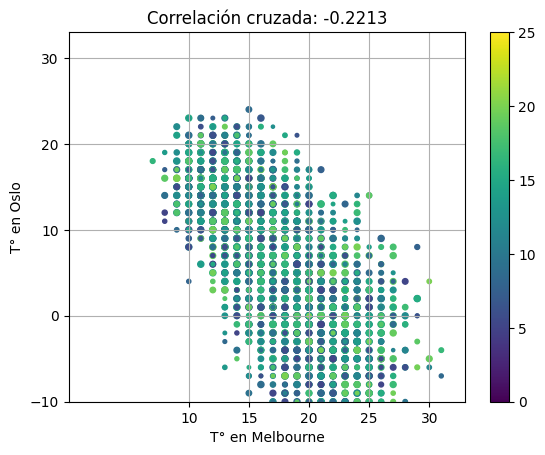

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def getPlot_pandas(nombre1, df1, nombre2, df2):
    # Extraer las columnas de temperatura
    temp1 = df1["AvgTemperature"]
    temp2 = df2["AvgTemperature"]

    # Calcular la correlación cruzada (pearson)
    correlacion = temp1.corr(temp2)

    # Crear gráfico de dispersión
    fig, ax = plt.subplots()
    sizes = np.random.uniform(5, 20, len(temp1))
    colors = np.random.uniform(5, 20, len(temp1))

    scatter = ax.scatter(temp1, temp2, s=sizes, c=colors, vmin=0, vmax=25)

    ax.set(
        xlim=(0, 33), xticks=np.arange(10, 35, 5),
        ylim=(-10, 33), yticks=np.arange(-10, 35, 10)
    )
    ax.grid(True)

    # Etiquetas y título
    ax.set_title(f"Correlación cruzada: {correlacion:.4f}")
    ax.set_xlabel(nombre1)
    ax.set_ylabel(nombre2)
    plt.colorbar(scatter, ax=ax)
    plt.show()

getPlot_pandas("T° en Quito", S1_quito, "T° en Melbourne", S2_melbourne)
getPlot_pandas("T° en Quito", S1_quito, "T° en Oslo", S3_oslo)
getPlot_pandas("T° en Melbourne", S2_melbourne, "T° en Oslo", S3_oslo)



# Ejercicio 2

**2.1)** Considerando los valores de temperatura t que componen cada señal Si, construir una nueva señal Ti  compuesta por una secuencia de símbolos discretos F, T o C, definidos según:

F (frío): si t < 11°C

T (templado): si 11 ≤ t < 19°C

C (cálido): si t ≥ 19°C

Para cada Ti:

Modelar la fuente con memoria de orden 1 (Markov), obtener la matriz de transición y analizar su comportamiento (por ejemplo, tratá de descubrir cosas como: En Oslo, si hace frío hoy, es casi seguro que siga así hasta julio..)


In [ ]:
def clasificar_temp(t):
    if t < 11:
        return 'F'
    elif t>= 11 and t < 19:
        return 'T'
    else:
        return 'C'

# Aplicar la clasificación a cada ciudad
T1_quito = S1_quito["AvgTemperature"].apply(clasificar_temp)
T2_melbourne = S2_melbourne["AvgTemperature"].apply(clasificar_temp)
T3_oslo = S3_oslo["AvgTemperature"].apply(clasificar_temp)

print("Ejemplo Quito:\n", S1_quito.head())
print("Ejemplo Melbourne:\n", S2_melbourne.head())
print("Ejemplo Oslo:\n", S3_oslo.head())

print("\nEjemplo Quito:\n", T1_quito.head())
print("Ejemplo Melbourne:\n", T2_melbourne.head())
print("Ejemplo Oslo:\n", T3_oslo.head())

# Para ver como quedaron

from collections import Counter

def resumen_completo_ciudad(nombre, secuencia):
    conteo = dict(Counter(secuencia))
    lista_completa = list(secuencia)
    print(f"{nombre}:\n  {conteo} \n  {lista_completa}\n")

# Aplicamos a las tres ciudades
resumen_completo_ciudad("Quito", T1_quito)
resumen_completo_ciudad("Melbourne", T2_melbourne)
resumen_completo_ciudad("Oslo", T3_oslo)


Ejemplo Quito:
    AvgTemperature
0            14.0
1            14.0
2            15.0
3            14.0
4            13.0
Ejemplo Melbourne:
    AvgTemperature
0            22.0
1            17.0
2            20.0
3            23.0
4            23.0
Ejemplo Oslo:
    AvgTemperature
0            -5.0
1            -6.0
2           -13.0
3           -15.0
4            -4.0

Ejemplo Quito:
 0    T
1    T
2    T
3    T
4    T
Name: AvgTemperature, dtype: object
Ejemplo Melbourne:
 0    C
1    T
2    C
3    C
4    C
Name: AvgTemperature, dtype: object
Ejemplo Oslo:
 0    F
1    F
2    F
3    F
4    F
Name: AvgTemperature, dtype: object
Quito:
  {'T': 5803, 'F': 37, 'C': 4} 
  ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'

In [ ]:
import numpy as np
import pandas as pd

def matriz_transicion_columna_fila(secuencia):
    estados = ['F', 'T', 'C']
    transiciones = pd.DataFrame(0, index=estados, columns=estados)

    for i in range(len(secuencia) - 1):
        actual = secuencia.iloc[i]
        siguiente = secuencia.iloc[i + 1]
        transiciones.loc[siguiente, actual] += 1

    matriz_prob = transiciones.div(transiciones.sum(axis=0), axis=1)
    return matriz_prob

matriz_quito = matriz_transicion_columna_fila(T1_quito)
matriz_melbourne = matriz_transicion_columna_fila(T2_melbourne)
matriz_oslo = matriz_transicion_columna_fila(T3_oslo)
print("🡧 Matriz de transición - Quito:")
print(matriz_quito)
print("🡧 Matriz de transición - Melbourne:")
print(matriz_melbourne)
print("🡧 Matriz de transición - Oslo:")
print(matriz_oslo)

🡧 Matriz de transición - Quito:
          F         T    C
F  0.054054  0.006032  0.0
T  0.945946  0.993278  1.0
C  0.000000  0.000689  0.0
🡧 Matriz de transición - Melbourne:
       F         T         C
F  0.470  0.033480  0.002606
T  0.495  0.835644  0.144080
C  0.035  0.130876  0.853313
🡧 Matriz de transición - Oslo:
          F         T         C
F  0.959321  0.099390  0.000000
T  0.040679  0.865244  0.295918
C  0.000000  0.035366  0.704082


**2.2)** Usar muestreo Monte Carlo para obtener, para cada símbolo:

1.   La probabilidad estacionaria (esa a la que llegás después de mucho simular).
2.   El tiempo medio de 1° recurrencia (ese que te dice, en promedio, cuánto tarda un símbolo en volver a aparecer después de haberse emitido).

In [ ]:
# calcula prob estacionaria

from math import inf
import random

epsilon = 0.00001  # Umbral de convergencia
MIN_IT = 10000       # Iteraciones mínimas antes de verificar convergencia
SIMBOLOS = 3         # F, T, C

# Verifica si dos vectores son suficientemente similares
def converge(vec1, vec2):
    for i in range(SIMBOLOS):
        if abs(vec1[i] - vec2[i]) > epsilon:
            return False
    return True

# Genera un primer símbolo según distribución uniforme [1/3, 1/3, 1/3]
def primer_simb():
    r = random.uniform(0,1)
    if r < 1/3:
        return 0
    elif r < 2/3:
        return 1
    else:
        return 2

# Dado un símbolo anterior, genera el siguiente según la matriz de transición
def sig_dado_ant(matriz, s_ant):
    r = random.uniform(0,1)
    acumulado = 0
    for i in range(SIMBOLOS):
        acumulado += matriz[i][s_ant]
        if r < acumulado:
            return i

# Estima el vector estacionario usando simulación Monte Carlo
def calcular_vector_estacionario(matriz):
    emisiones = [0, 0, 0]
    vector_est = [0, 0, 0]
    vector_est_ant = [-1, -1, -1]
    cant_simb = 0

    s = primer_simb()
    while cant_simb < MIN_IT or not converge(vector_est, vector_est_ant):
        s = sig_dado_ant(matriz, s)
        emisiones[s] += 1
        cant_simb += 1
        vector_est_ant = vector_est[:]
        vector_est = [emisiones[i] / cant_simb for i in range(SIMBOLOS)]

    return vector_est

vector_estacionario_quito = calcular_vector_estacionario(matriz_quito.values.tolist())
print("Vector estacionario (Quito):", vector_estacionario_quito)
vector_estacionario_melbourne = calcular_vector_estacionario(matriz_melbourne.values.tolist())
print("Vector estacionario (Melbourne):", vector_estacionario_melbourne)
vector_estacionario_oslo = calcular_vector_estacionario(matriz_oslo.values.tolist())
print("Vector estacionario (Oslo):", vector_estacionario_oslo)

Vector estacionario (Quito): [0.0065, 0.9931, 0.0004]
Vector estacionario (Melbourne): [0.03607895159993568, 0.5024923621160958, 0.4614286862839685]
Vector estacionario (Oslo): [0.6803804398836154, 0.2838594625035197, 0.035760097612864875]


In [ ]:
# calcula tiempo medio de primera recurrencia

import random

epsilon = 0.00001
T_MIN = 10000
simbolos = ['F', 'T', 'C']  # asumimos 3 símbolos

# Función para verificar convergencia entre dos valores escalares
def converge(a, b):
    return abs(a - b) < epsilon

# Devuelve el próximo símbolo dado uno anterior, usando matriz de transición acumulada
def sig_dado_ant(s_ant, matriz_acum):
    r = random.uniform(0,1)
    for i in range(len(simbolos)):
        if r < matriz_acum[i][s_ant]:
            return i

# Calcula el tiempo medio de primera recurrencia de un símbolo dado
def media_recurrencia(simbolo_idx, matriz_acum):
    retornos = 0
    media = 0
    media_ant = -1
    t_actual = 0
    s = simbolo_idx

    while not converge(media, media_ant) or t_actual < T_MIN:
        s = sig_dado_ant(s, matriz_acum)
        t_actual += 1

        if s == simbolo_idx:
            retornos += 1
            media_ant = media
            media = t_actual / retornos

    return media

def matriz_acumulada(matriz_transicion):
    estados = list(matriz_transicion.columns)
    matriz_acum = []

    for i in range(len(estados)):
        fila = []
        for j in range(len(estados)):
            suma = 0
            for k in range(i + 1):
                suma += matriz_transicion.iloc[k, j]
            fila.append(suma)
        matriz_acum.append(fila)

    return matriz_acum

# Crear la matriz acumulada de Quito
matriz_acum_quito = matriz_acumulada(matriz_quito)

# Calcular el tiempo medio de primera recurrencia para cada símbolo
for idx, simb in enumerate(simbolos):
    tiempo = media_recurrencia(idx, matriz_acum_quito)
    print(f"Tiempo medio de 1° recurrencia para '{simb}' (Quito): {tiempo:.3f}")

# Crear la matriz acumulada de Melbourne
matriz_acum_melbourne = matriz_acumulada(matriz_melbourne)

# Calcular el tiempo medio de primera recurrencia para cada símbolo
for idx, simb in enumerate(simbolos):
    tiempo = media_recurrencia(idx, matriz_acum_melbourne)
    print(f"Tiempo medio de 1° recurrencia para '{simb}' (Melbourne): {tiempo:.3f}")

# Crear la matriz acumulada de Oslo
matriz_acum_oslo = matriz_acumulada(matriz_oslo)

# Calcular el tiempo medio de primera recurrencia para cada símbolo
for idx, simb in enumerate(simbolos):
    tiempo = media_recurrencia(idx, matriz_acum_oslo)
    print(f"Tiempo medio de 1° recurrencia para '{simb}' (Oslo): {tiempo:.3f}")

Tiempo medio de 1° recurrencia para 'F' (Quito): 158.014
Tiempo medio de 1° recurrencia para 'T' (Quito): 1.008
Tiempo medio de 1° recurrencia para 'C' (Quito): 1461.895
Tiempo medio de 1° recurrencia para 'F' (Melbourne): 30.994
Tiempo medio de 1° recurrencia para 'T' (Melbourne): 1.987
Tiempo medio de 1° recurrencia para 'C' (Melbourne): 2.173
Tiempo medio de 1° recurrencia para 'F' (Oslo): 1.447
Tiempo medio de 1° recurrencia para 'T' (Oslo): 3.582
Tiempo medio de 1° recurrencia para 'C' (Oslo): 31.002


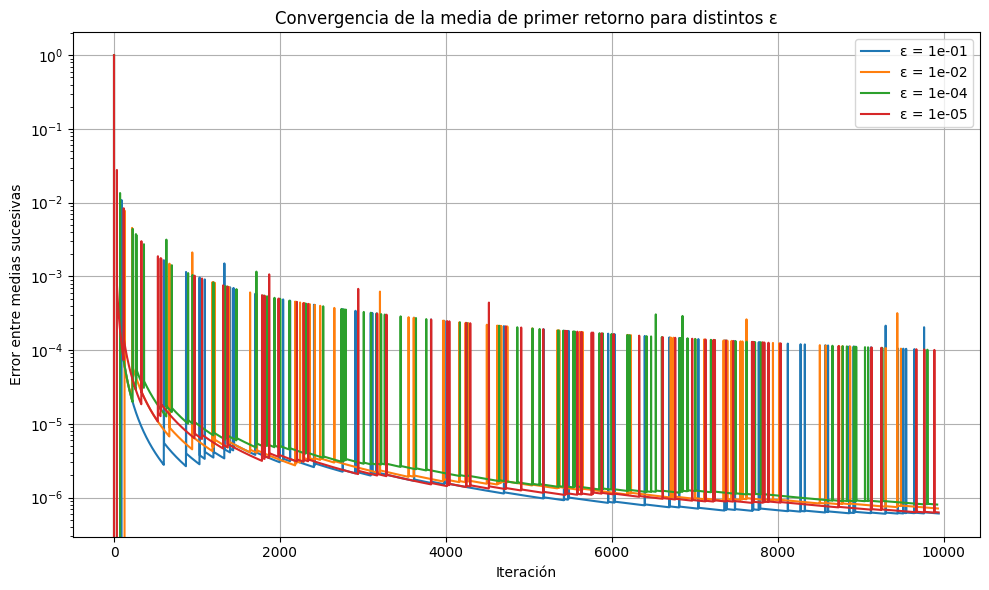

In [ ]:
# grafico para ver la convergencia de la media con distintos valores de epsilon

import random
import matplotlib.pyplot as plt

# Valores de convergencia a probar
epsilons = [0.1, 0.01, 0.0001, 0.00001]
T_MIN = 10000

# Simbolos: 0 = F, 1 = T, 2 = C
simbolo_prueba = 1  # Ej: temperatura templada ('T')

# Usamos la matriz_quito que ya tenés cargada, convertida a lista
matriz = matriz_quito.values.tolist()

# Función de muestreo Montecarlo para calcular media de primer retorno
def tiempo_media_recurrencia(matriz, simbolo, epsilon):
    retornos = 0
    media = 0
    media_ant = -1
    t_actual = 0
    s = simbolo
    errores = []

    while abs(media - media_ant) > epsilon or t_actual < T_MIN:
        r = random.random()
        acumulado = 0
        for i in range(3):
            acumulado += matriz[i][s]
            if r < acumulado:
                s = i
                break
        t_actual += 1
        if s == simbolo:
            retornos += 1
            media_ant = media
            media = t_actual / retornos
            errores.append(abs(media - media_ant))

    return media, errores

# Ejecutamos el experimento para cada epsilon
resultados = []
for eps in epsilons:
    media, errores = tiempo_media_recurrencia(matriz, simbolo_prueba, eps)
    resultados.append((eps, errores))

# Graficamos
plt.figure(figsize=(10, 6))
for eps, errores in resultados:
    plt.plot(range(len(errores)), errores, label=f"ε = {eps:.0e}")

plt.yscale("log")
plt.xlabel("Iteración")
plt.ylabel("Error entre medias sucesivas")
plt.title("Convergencia de la media de primer retorno para distintos ε")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Ejercicio 3

**3.1)** Calcular la entropía de cada fuente Ti :

*   Sin memoria (orden 0), considerando símbolos individuales.
*   Con memoria (orden 1), usando información sobre transiciones entre símbolos.



ENTROPIA --> SIN MEMORIA


In [ ]:
# H = - sum( pi * log2(pi) )
def getEntropia_SM(distribucion):
    suma = 0
    for pi in distribucion:  # Iteramos sobre los valores directamente
        if pi > 0:
            suma -= pi * np.log2(pi)
    return suma


In [ ]:
entropia_SM_quito = getEntropia_SM(vector_estacionario_quito)
entropia_SM_melbourne = getEntropia_SM(vector_estacionario_melbourne)
entropia_SM_oslo = getEntropia_SM(vector_estacionario_oslo)

print('Entropía para la fuente S1 -Quito- sin memoria: ',entropia_SM_quito)
print('Entropía para la fuente S2 -Melbourne- sin memoria: ',entropia_SM_melbourne)
print('Entropía para la fuente S3 -Oslo- sin memoria:    ',entropia_SM_oslo)

Entropía para la fuente S1 -Quito- sin memoria:  0.061659997797526275
Entropía para la fuente S2 -Melbourne- sin memoria:  1.1866747841342722
Entropía para la fuente S3 -Oslo- sin memoria:     1.065557521442322


CON MEMORIA


In [ ]:
from math import log2

def calcular_entropia_condicional(matriz_transicion, vector_estacionario):
    H1 = 0
    for i in range(len(matriz_transicion)):
        hi = 0
        for j in range(len(matriz_transicion[i])):
            p = matriz_transicion[j][i]
            if p > 0:
                hi += -p * log2(p)
        H1 += vector_estacionario[i] * hi
    return H1

entropia_CM_quito = calcular_entropia_condicional(matriz_quito.values.tolist(), vector_estacionario_quito)
print(f"Entropía para la fuente markoviana (Quito): {entropia_CM_quito:.4f} bits")

entropia_CM_melbourne = calcular_entropia_condicional(matriz_melbourne.values.tolist(), vector_estacionario_melbourne)
print(f"Entropía para la fuente markoviana (Melbourne): {entropia_CM_melbourne:.4f} bits")

entropia_CM_oslo = calcular_entropia_condicional(matriz_oslo.values.tolist(), vector_estacionario_oslo)
print(f"Entropía para la fuente markoviana (Oslo): {entropia_CM_oslo:.4f} bits")

Entropía para la fuente markoviana (Quito): 0.0629 bits
Entropía para la fuente markoviana (Melbourne): 0.7131 bits
Entropía para la fuente markoviana (Oslo): 0.3920 bits


**3.2)** Implementar el algoritmo de Huffman para codificar cada señal Ti  y su extensión a orden 2, teniendo en cuenta que la fuente es markoviana. Aplicar el Teorema de Shannon y analizar resultados

**Codificacion Huffman**

El método de codificación de Huffman recibe un diccionario en el que las claves son cada símbolo y los valores asociados son las respectivas probabilidades de que aparezcan en la cadena.

La convención es que, en cada iteración al seleccionar los dos símbolos de menor probabilidad, el de la menor recibe un 0 y el de la mayor un 1.

Retorna una codificación en formato diccionario donde las claves son los símbolos y los valores son las codificaciones asociadas.

In [ ]:
# obtener codificacion huffman para cada señal

# Convierte el diccionario a una lista de listas: [probabilidad, [símbolos]] (si no nos daba error)
def p_distribution_list(p_distribution_dict):
    lista = []
    for simbolo in p_distribution_dict:
        elemento = [p_distribution_dict[simbolo], [simbolo]]
        lista.append(elemento)
    return lista

# Une dos elementos en una nueva entrada con la suma de probabilidades y símbolos combinados
def join(s1, s2):
    suma = s1[0] + s2[0]
    simbolos = s1[1] + s2[1]
    return [suma, simbolos]

# Calcula la longitud promedio del código
def length(dist, codificacion):
    l = 0
    for s in dist:
        l += dist[s] * len(codificacion[s])
    return l

# Construye los códigos de Huffman
def getHuffmanCoding(p_dist):
    code = {key: '' for key in p_dist}
    p_queue = p_distribution_list(p_dist)
    p_queue.sort(reverse=True)

    for _ in range(len(p_dist) - 1):
        menos_probable = p_queue.pop()
        segundo_menos = p_queue.pop()

        for s in menos_probable[1]:
            code[s] = '0' + code[s]
        for s in segundo_menos[1]:
            code[s] = '1' + code[s]

        p_queue.append(join(menos_probable, segundo_menos))
        p_queue.sort(reverse=True)

    print('Longitud media:', round(length(p_dist, code), 4))
    print('Codificación:')
    for s in code:
        print(f"  {s}: {code[s]}")
    return code

def estacionario_a_dict(vector_est, simbolos=['F', 'T', 'C']):
    return {simbolos[i]: vector_est[i] for i in range(len(simbolos))}

p_dist_quito = estacionario_a_dict(vector_estacionario_quito)
codigo_quito = getHuffmanCoding(p_dist_quito)

p_dist_melbourne = estacionario_a_dict(vector_estacionario_melbourne)
codigo_melbourne = getHuffmanCoding(p_dist_melbourne)

p_dist_oslo = estacionario_a_dict(vector_estacionario_oslo)
codigo_oslo = getHuffmanCoding(p_dist_oslo)

Longitud media: 1.0069
Codificación:
  F: 01
  T: 1
  C: 00
Longitud media: 1.4975
Codificación:
  F: 00
  T: 1
  C: 01
Longitud media: 1.3196
Codificación:
  F: 1
  T: 01
  C: 00


In [ ]:
# obtener la extension de orden 2 y sus probabilidades

def generar_extension_orden2_letras(vector_estacionario, matriz_transicion):

    simbolos = ['F', 'T', 'C']
    extension = {}

    for i in range(SIMBOLOS):
        for j in range(SIMBOLOS):
            p_i = vector_estacionario[i]
            p_j_dado_i = matriz_transicion[j][i]
            par_simbolico = (simbolos[i], simbolos[j])
            extension[par_simbolico] = p_i * p_j_dado_i

    return extension

# Uso con Quito como ejemplo:
extension_orden2_letras_quito = generar_extension_orden2_letras(vector_estacionario_quito, matriz_quito.values.tolist())
extension_orden2_letras_melbourne = generar_extension_orden2_letras(vector_estacionario_melbourne, matriz_melbourne.values.tolist())
extension_orden2_letras_oslo = generar_extension_orden2_letras(vector_estacionario_oslo, matriz_oslo.values.tolist())

print("Extensión a orden 2 QUITO:")
for (s1, s2), p in sorted(extension_orden2_letras_quito.items()):
    print(f"P({s1},{s2}) = {p}")

print("\nExtensión a orden 2 MELBOURNE:")
for (s1, s2), p in sorted(extension_orden2_letras_melbourne.items()):
    print(f"P({s1},{s2}) = {p}")

print("\nExtensión a orden 2 OSLO:")
for (s1, s2), p in sorted(extension_orden2_letras_oslo.items()):
    print(f"P({s1},{s2}) = {p}")



Extensión a orden 2 QUITO:
P(C,C) = 0.0
P(C,F) = 0.0
P(C,T) = 0.0004
P(F,C) = 0.0
P(F,F) = 0.00035135135135135135
P(F,T) = 0.006148648648648648
P(T,C) = 0.0006846604619096863
P(T,F) = 0.005990779041709755
P(T,T) = 0.9864245604963805

Extensión a orden 2 MELBOURNE:
P(C,C) = 0.3937433168141682
P(C,F) = 0.0012025319448949292
P(C,T) = 0.06648283752490536
P(F,C) = 0.001262763305997749
P(F,F) = 0.01695710725196977
P(F,T) = 0.017859081041968164
P(T,C) = 0.06576413396649614
P(T,F) = 0.016823383107708315
P(T,T) = 0.4199048450418914

Extensión a orden 2 OSLO:
P(C,C) = 0.025178027911098737
P(C,F) = 0.0
P(C,T) = 0.010582069701766136
P(F,C) = 0.0
P(F,F) = 0.6527033718274563
P(F,T) = 0.02767706805615905
P(T,C) = 0.010038932210490329
P(T,F) = 0.028212861212240068
P(T,T) = 0.2456076690807893


In [ ]:
# Codificacion de orden 2

codigo_quito_orden2 = getHuffmanCoding(extension_orden2_letras_quito)

codigo_melbourne_orden2 = getHuffmanCoding(extension_orden2_letras_melbourne)

codigo_oslo_orden2 = getHuffmanCoding(extension_orden2_letras_oslo)

Longitud media: 1.0235
Codificación:
  ('F', 'F'): 010101
  ('F', 'T'): 00
  ('F', 'C'): 0101001
  ('T', 'F'): 011
  ('T', 'T'): 1
  ('T', 'C'): 0100
  ('C', 'F'): 01010001
  ('C', 'T'): 01011
  ('C', 'C'): 01010000
Longitud media: 1.997
Codificación:
  ('F', 'F'): 101010
  ('F', 'T'): 101011
  ('F', 'C'): 1010001
  ('T', 'F'): 101001
  ('T', 'T'): 0
  ('T', 'C'): 1011
  ('C', 'F'): 1010000
  ('C', 'T'): 100
  ('C', 'C'): 11
Longitud media: 1.5813
Codificación:
  ('F', 'F'): 1
  ('F', 'T'): 0010
  ('F', 'C'): 0000001
  ('T', 'F'): 0011
  ('T', 'T'): 01
  ('T', 'C'): 000001
  ('C', 'F'): 0000000
  ('C', 'T'): 00001
  ('C', 'C'): 0001


VERIFICACION SHANNON


Cota inf: 0.06166 | L/n: 1.0069 | Cota sup: 1.06166


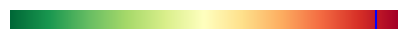

QUITO de orden 1 se verifica con Shannon?: True

Cota inf: 0.0623 | L/n: 0.51177 | Cota sup: 0.5623


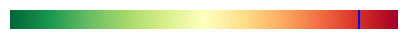

QUITO de orden 2 se verifica con Shannon?: True

Cota inf: 1.18667 | L/n: 1.49751 | Cota sup: 2.18667


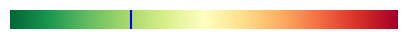

MELBOURNE de orden 1 se verifica con Shannon?: True

Cota inf: 0.94989 | L/n: 0.9985 | Cota sup: 1.44989


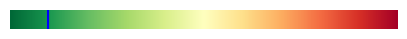

MELBOURNE de orden 2 se verifica con Shannon?: True

Cota inf: 1.06556 | L/n: 1.31962 | Cota sup: 2.06556


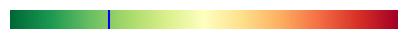

OSLO de orden 1 se verifica con Shannon?: True

Cota inf: 0.72876 | L/n: 0.79067 | Cota sup: 1.22876


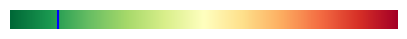

OSLO de orden 2 se verifica con Shannon?: True



In [ ]:
# Verificacion del teorema de shannon

# Función que grafica la longitud promedio por símbolo acotada por la entropía
def displayCodeQuality(cota_inf,valor,cota_sup):
  fig, ax = plt.subplots(figsize=(5, 0.25))
  cmap = plt.get_cmap('RdYlGn_r')
  norm = plt.Normalize(cota_inf, cota_sup)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  escala = int((cota_sup-cota_inf)*1000)
  gradient = np.linspace(cota_inf, cota_sup, escala).reshape(1, -1)
  gradient = np.vstack((gradient, gradient))
  ax.imshow(gradient, aspect='auto', cmap=cmap, norm=norm)
  # Graficar el valor entre las cotas
  ax.axvline(x= (valor - cota_inf) / (cota_sup - cota_inf) * escala, color='blue')
  ax.set_axis_off()
  plt.show()

def checksShannon_SM(dist,entropia,coding,n):
  l = length(dist,coding)
  print(f"Cota inf: {round(entropia, 5)} | L/n: {round(l/n, 5)} | Cota sup: {round(entropia + 1/n, 5)}")
  displayCodeQuality(entropia,l/n,entropia+1/n)
  return entropia <= l/n <= entropia + 1/n

def checksShannon_CM(dist,entropia_SM,entropia_CM,coding,n):
  l = length(dist,coding)
  cota_inf = entropia_SM/n + (1-(1/n)) * entropia_CM
  cota_sup = cota_inf + 1/n
  print(f"Cota inf: {round(cota_inf, 5)} | L/n: {round(l/n, 5)} | Cota sup: {round(cota_sup, 5)}")
  displayCodeQuality(cota_inf,l/n,cota_sup)
  return cota_inf <= l/n <= cota_sup

# Codificaciones de orden 1 y 2
print('QUITO de orden 1 se verifica con Shannon?: '+str(checksShannon_SM(p_dist_quito,entropia_SM_quito,codigo_quito,1)) + '\n' )
print('QUITO de orden 2 se verifica con Shannon?: '+str(checksShannon_CM(extension_orden2_letras_quito,entropia_SM_quito,entropia_CM_quito,codigo_quito_orden2,2)) + '\n' )
print('MELBOURNE de orden 1 se verifica con Shannon?: '+str(checksShannon_SM(p_dist_melbourne,entropia_SM_melbourne,codigo_melbourne,1)) + '\n' )
print('MELBOURNE de orden 2 se verifica con Shannon?: '+str(checksShannon_CM(extension_orden2_letras_melbourne,entropia_SM_melbourne,entropia_CM_melbourne,codigo_melbourne_orden2,2)) + '\n' )
print('OSLO de orden 1 se verifica con Shannon?: '+str(checksShannon_SM(p_dist_oslo,entropia_SM_oslo,codigo_oslo,1)) + '\n' )
print('OSLO de orden 2 se verifica con Shannon?: '+str(checksShannon_CM(extension_orden2_letras_oslo,entropia_SM_oslo,entropia_CM_oslo,codigo_oslo_orden2,2)) + '\n' )

**3.3)** En cada caso, calcular la longitud total del mensaje codificado (en bits), compararla con la longitud original del archivo y obtener la tan ansiada tasa de compresión.

In [ ]:
from collections import Counter

# Convertimos a listas
TL1_quito = list(T1_quito)
TL2_melbourne = list(T2_melbourne)
TL3_oslo = list(T3_oslo)

# Tamaño original del mensaje (orden 1 = 1 símbolo = 8 bits, orden 2 = 2 símbolos = 16 bits)
def original_size(data, orden=1):
    bits_por_simbolo = 8 * orden
    cantidad_simbolos = len(data) - (orden - 1)
    return cantidad_simbolos * bits_por_simbolo

# Tamaño comprimido en bits
def comp_size(cat_count, coding):
    bits = 0
    for simbolo in cat_count:
        if simbolo in coding:
            bits += cat_count[simbolo] * len(coding[simbolo])
    return bits

# Tasa de compresión
def getTasaDeCompresion(t_orig, t_comp):
    if t_comp == 0:
        return "∞"
    tasa = t_orig / t_comp
    return f'{round(tasa, 2)}:1'

# Quito
conteo_T1_o1 = Counter(TL1_quito)
conteo_T1_o2 = Counter([(TL1_quito[i], TL1_quito[i+1]) for i in range(len(TL1_quito)-1)])
t_orig_S1_o1 = original_size(TL1_quito, orden=1)
t_orig_S1_o2 = original_size(TL1_quito, orden=2)
t_comp_S1_o1 = comp_size(conteo_T1_o1, codigo_quito)
t_comp_S1_o2 = comp_size(conteo_T1_o2, codigo_quito_orden2)

# Melbourne
conteo_T2_o1 = Counter(TL2_melbourne)
conteo_T2_o2 = Counter([(TL2_melbourne[i], TL2_melbourne[i+1]) for i in range(len(TL2_melbourne)-1)])
t_orig_S2_o1 = original_size(TL2_melbourne, orden=1)
t_orig_S2_o2 = original_size(TL2_melbourne, orden=2)
t_comp_S2_o1 = comp_size(conteo_T2_o1, codigo_melbourne)
t_comp_S2_o2 = comp_size(conteo_T2_o2, codigo_melbourne_orden2)

# Oslo
conteo_T3_o1 = Counter(TL3_oslo)
conteo_T3_o2 = Counter([(TL3_oslo[i], TL3_oslo[i+1]) for i in range(len(TL3_oslo)-1)])
t_orig_S3_o1 = original_size(TL3_oslo, orden=1)
t_orig_S3_o2 = original_size(TL3_oslo, orden=2)
t_comp_S3_o1 = comp_size(conteo_T3_o1, codigo_oslo)
t_comp_S3_o2 = comp_size(conteo_T3_o2, codigo_oslo_orden2)

# Resultados
print('Tasas de compresión de QUITO:')
print(f'Orden 1 → Original: {t_orig_S1_o1} bits, Comprimido: {t_comp_S1_o1} bits, Tasa: {getTasaDeCompresion(t_orig_S1_o1, t_comp_S1_o1)}')
print(f'Orden 2 → Original: {t_orig_S1_o2} bits, Comprimido: {t_comp_S1_o2} bits, Tasa: {getTasaDeCompresion(t_orig_S1_o2, t_comp_S1_o2)}\n')

print('Tasas de compresión de MELBOURNE:')
print(f'Orden 1 → Original: {t_orig_S2_o1} bits, Comprimido: {t_comp_S2_o1} bits, Tasa: {getTasaDeCompresion(t_orig_S2_o1, t_comp_S2_o1)}')
print(f'Orden 2 → Original: {t_orig_S2_o2} bits, Comprimido: {t_comp_S2_o2} bits, Tasa: {getTasaDeCompresion(t_orig_S2_o2, t_comp_S2_o2)}\n')

print('Tasas de compresión de OSLO:')
print(f'Orden 1 → Original: {t_orig_S3_o1} bits, Comprimido: {t_comp_S3_o1} bits, Tasa: {getTasaDeCompresion(t_orig_S3_o1, t_comp_S3_o1)}')
print(f'Orden 2 → Original: {t_orig_S3_o2} bits, Comprimido: {t_comp_S3_o2} bits, Tasa: {getTasaDeCompresion(t_orig_S3_o2, t_comp_S3_o2)}')


Tasas de compresión de QUITO:
Orden 1 → Original: 46752 bits, Comprimido: 5885 bits, Tasa: 7.94:1
Orden 2 → Original: 93488 bits, Comprimido: 5986 bits, Tasa: 15.62:1

Tasas de compresión de MELBOURNE:
Orden 1 → Original: 46752 bits, Comprimido: 8731 bits, Tasa: 5.35:1
Orden 2 → Original: 93488 bits, Comprimido: 11614 bits, Tasa: 8.05:1

Tasas de compresión de OSLO:
Orden 1 → Original: 46752 bits, Comprimido: 7680 bits, Tasa: 6.09:1
Orden 2 → Original: 93488 bits, Comprimido: 9176 bits, Tasa: 10.19:1


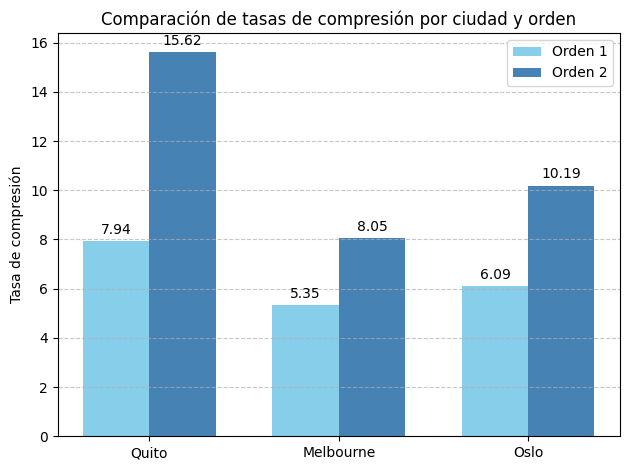

In [ ]:
# gráfico para comparar las tasas de compresion

import matplotlib.pyplot as plt
import numpy as np

# Datos
ciudades = ['Quito', 'Melbourne', 'Oslo']
tasa_orden1 = [7.94, 5.35, 6.09]
tasa_orden2 = [15.62, 8.05, 10.19]

x = np.arange(len(ciudades))
width = 0.35

# Gráfico
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, tasa_orden1, width, label='Orden 1', color='skyblue')
bars2 = ax.bar(x + width/2, tasa_orden2, width, label='Orden 2', color='steelblue')

# Etiquetas
ax.set_ylabel('Tasa de compresión')
ax.set_title('Comparación de tasas de compresión por ciudad y orden')
ax.set_xticks(x)
ax.set_xticklabels(ciudades)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Ejercicio 4

**4.1)** Generar T4 (de igual manera igual que se generaron las otras Ti), y construir la matriz de canal comparando T2 (entrada) y T4 (salida).


In [ ]:
import pandas as pd

S4_melbourne_ruidoso = pd.read_csv(url_melbourne_ruidoso)
print(f"Temperatura ruidosa de Melbourne por día: {S4_melbourne_ruidoso['AvgTemperature'].to_list()}")

Temperatura ruidosa de Melbourne por día: [26, 14, 17, 25, 28, 23, 19, 21, 20, 26, 20, 19, 21, 28, 27, 23, 24, 19, 17, 16, 19, 14, 18, 24, 20, 21, 18, 17, 22, 19, 20, 24, 26, 27, 24, 25, 21, 23, 18, 21, 24, 27, 26, 22, 21, 17, 19, 23, 15, 23, 18, 25, 18, 22, 20, 21, 19, 24, 21, 24, 19, 26, 18, 20, 27, 23, 26, 23, 20, 13, 17, 15, 21, 14, 17, 22, 28, 23, 23, 19, 22, 17, 23, 23, 22, 17, 17, 23, 24, 20, 18, 22, 13, 22, 20, 19, 13, 17, 18, 12, 20, 12, 23, 22, 16, 19, 13, 17, 21, 12, 16, 22, 18, 19, 14, 14, 16, 16, 23, 18, 20, 23, 19, 14, 9, 11, 12, 15, 18, 15, 21, 19, 21, 20, 10, 12, 21, 17, 19, 17, 15, 13, 20, 22, 17, 10, 11, 13, 18, 13, 16, 10, 15, 16, 16, 15, 15, 18, 21, 21, 16, 11, 15, 13, 17, 13, 12, 9, 14, 15, 14, 14, 5, 15, 8, 10, 12, 16, 16, 12, 18, 9, 14, 16, 4, 8, 5, 9, 6, 6, 11, 13, 10, 15, 7, 14, 8, 12, 15, 6, 14, 16, 18, 6, 13, 9, 11, 13, 10, 11, 12, 16, 8, 12, 12, 14, 9, 10, 9, 11, 15, 10, 8, 7, 10, 14, 10, 14, 17, 23, 18, 23, 15, 14, 15, 14, 23, 19, 18, 16, 14, 17, 23, 20, 10

In [ ]:
# Índices simbólicos
indexes = {'F': 0, 'T': 1, 'C': 2}

# Construcción de la matriz conjunta (canal)
def matrizCanal(entrada, salida):
    n = len(indexes)
    matriz = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(len(entrada)):
        e = entrada[i]
        s = salida[i]
        if e in indexes and s in indexes:
            matriz[indexes[s]][indexes[e]] += 1  # P(salida | entrada)

    # Normalización conjunta
    total = sum(sum(row) for row in matriz)
    matriz_normalizada = [[v / total for v in fila] for fila in matriz]
    return matriz_normalizada

# Conversión conjunta a condicional (por columnas)
def getMatrizCond(matrizConjunta):
    n = len(matrizConjunta)
    cond = [[0 for _ in range(n)] for _ in range(n)]
    suma_columnas = [sum(matrizConjunta[f][c] for f in range(n)) for c in range(n)]

    for c in range(n):
        for f in range(n):
            cond[f][c] = matrizConjunta[f][c] / suma_columnas[c] if suma_columnas[c] > 0 else 0
    return cond

# Aplicamos clasificación al dataset ruidoso
T4_melbourne_ruidoso = S4_melbourne_ruidoso["AvgTemperature"].apply(clasificar_temp)

# Construimos matriz conjunta y condicional
matriz_conjunta_melb = matrizCanal(T2_melbourne.tolist(), T4_melbourne_ruidoso.tolist())
matriz_cond_melb = getMatrizCond(matriz_conjunta_melb)

# Impresión
print('\nMATRIZ CONJUNTA DEL CANAL (Melbourne):\n')
for fila in matriz_conjunta_melb:
    print([round(x, 4) for x in fila])

print('\nMATRIZ CONDICIONAL DEL CANAL (P(salida|entrada)):\n')
for fila in matriz_cond_melb:
    print([round(x, 4) for x in fila])

import numpy as np

matriz_np = np.array(matriz_conjunta_melb)
suma_columnas = matriz_np.sum(axis=0)

print("\nP(x): (Suma por columnas de matriz conjunta)", suma_columnas)


MATRIZ CONJUNTA DEL CANAL (Melbourne):

[0.0209, 0.0707, 0.0]
[0.0133, 0.3414, 0.1117]
[0.0, 0.0939, 0.348]

MATRIZ CONDICIONAL DEL CANAL (P(salida|entrada)):

[0.61, 0.1397, 0.0]
[0.39, 0.6747, 0.243]
[0.0, 0.1857, 0.757]

P(x): (Suma por columnas de matriz conjunta) [0.03422313 0.50598905 0.45978782]


**4.2)** Calcula el Ruido del canal y la Información mutua.

In [ ]:
import math

def H_condicional(matriz_cond, distribucion_fuente):
    """Calcula H(Y|X): entropía condicional de salida dado la entrada"""
    H = 0
    for x in range(3):  # cada columna (entrada)
        for y in range(3):  # cada fila (salida)
            p_y_dado_x = matriz_cond[y][x]
            if p_y_dado_x > 0:
                H += distribucion_fuente[x] * p_y_dado_x * math.log2(1 / p_y_dado_x)
    return H

def H_salida(matriz_cond, distribucion_fuente):
    """Calcula H(Y): entropía de salida marginal"""
    p_salida = [0, 0, 0]
    for y in range(3):
        for x in range(3):
            p_salida[y] += distribucion_fuente[x] * matriz_cond[y][x]
    H = 0
    for p in p_salida:
        if p > 0:
            H += p * math.log2(1 / p)
    return H, p_salida

def informacion_mutua(HY, HY_X):
    return HY - HY_X

# Distribución fuente: vector estacionario de Melbourne
p_X = vector_estacionario_melbourne

# Cálculos
H_Y_dado_X = H_condicional(matriz_cond_melb, p_X)
H_Y, pY = H_salida(matriz_cond_melb, p_X)
I_XY = informacion_mutua(H_Y, H_Y_dado_X)

# Impresión
print(f"Entropía condicional H(Y|X) - Ruido: {H_Y_dado_X:.4f} bits")
print(f"Entropía marginal H(Y): {H_Y:.4f} bits")
print(f"Información mutua I(X;Y): {I_XY:.4f} bits")


Entropía condicional H(Y|X) - Ruido: 1.0224 bits
Entropía marginal H(Y): 1.3511 bits
Información mutua I(X;Y): 0.3288 bits
